# **Logistic Regression**

In [ ]:
import numpy as np
import pandas as pd

# data_x = pd.read_csv("sample_data/california_housing_train.csv")
# data_test = pd.read_csv("sample_data/california_housing_test.csv")
 
# numpy_x = np.loadtxt("sample_data/california_housing_train.csv",delimiter=",", skiprows=1)
# numpy_test = np.loadtxt("sample_data/california_housing_test.csv",delimiter=",", skiprows=1)


x_data = np.array([[1,2],[10,9],[5,7],[6,2],[5,2],[4,8],[9,5],[6,7]]).reshape(8,2)
y_data = np.array([0,1,1,0,0,1,1,1]).reshape(8,1)

w = np.random.rand(2,1)
b = np.random.rand(1)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def loss_function(x,t):
    print("third w = ", w)
    y = np.dot(x,w)+b
    h = sigmoid(y)
    return -np.sum(t*np.log(h)+(1-t)*np.log(1-h))

def derivative(f,x):
    temp = np.zeros_like(x)
    change_value = 1e-4

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        index = it.multi_index
        val = x[index]
        print("first w = ", val)
        x[index] = val + change_value
        print("second w = ", x[index])
        fx1 = f(x)

        x[index] = val
        fx2 = f(x)

        temp[index] = (fx1-fx2)/change_value
        it.iternext()
    return temp

f = lambda x: loss_function(x_data, y_data)
epochs = 10000
learning_rate = 1e-4

def error_val(x,t):
    y = np.dot(x,w)+b
    h = sigmoid(y)
    return -np.sum(t*np.log(h)+(1-t)*np.log(1-h))

def predict(x):
    y = np.dot(x,w)+b
    h = sigmoid(y)
    if(h < 0.5):
        print("불합격입니다.")
    else:
        print("합격입니다.")
    print(h)
for step in range(epochs):
    print("semi-last w = ", w)
    w -= learning_rate*derivative(f,w)
    print("last w = ", w)
    b -= learning_rate*derivative(f,b)

    if step % 500 == 0:
        print("step=",step,"loss=",error_val(x_data,y_data))

predict_data = np.array([10,8]).reshape(1,2)
predict_data2 = np.array([3,1]).reshape(1,2)
predict(predict_data)
predict(predict_data2)

semi-last w =  [[0.57152273]
 [0.64581965]]
first w =  0.5715227315146522
second w =  0.5716227315146521
third w =  [[0.57162273]
 [0.64581965]]
third w =  [[0.57152273]
 [0.64581965]]
first w =  0.6458196478286444
second w =  0.6459196478286444
third w =  [[0.57152273]
 [0.64591965]]
third w =  [[0.57152273]
 [0.64581965]]
last w =  [[0.57034209]
 [0.6452432 ]]
first w =  0.37285873031284733
second w =  0.3729587303128473
third w =  [[0.57034209]
 [0.6452432 ]]
third w =  [[0.57034209]
 [0.6452432 ]]
step= 0 loss= 11.953383903332549
semi-last w =  [[0.57034209]
 [0.6452432 ]]
first w =  0.5703420887015626
second w =  0.5704420887015625
third w =  [[0.57044209]
 [0.6452432 ]]
third w =  [[0.57034209]
 [0.6452432 ]]
first w =  0.6452432034754656
second w =  0.6453432034754656
third w =  [[0.57034209]
 [0.6453432 ]]
third w =  [[0.57034209]
 [0.6452432 ]]
last w =  [[0.56916155]
 [0.64466684]]
first w =  0.37257022877871815
second w =  0.37267022877871814
third w =  [[0.56916155]
 [0.644

KeyboardInterrupt: ignored

# **Using Logistic Regression to implement Logic gate**

In [ ]:
import numpy as np

class logicgate:
    def __init__(self, x, test):
        self.x = x
        self.test = test
        self.w = np.random.rand(x.shape[1], test.shape[1]) 
        self.b = np.random.rand(test.shape[1]) 

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def loss_function(self,x,test):
        z = np.dot(x, self.w)+self.b
        y = self.sigmoid(z)

        return -np.sum(test*np.log(y)+(1-test)*np.log(1-y))

    def numerical_derivative(self, f, x):
        change_value = 1e-4
        temp = np.zeros_like(x)
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

        while not it.finished:
            index = it.multi_index
            val = x[index]
            x[index] = val + change_value
            fx1 = f(x)

            x[index] = val
            fx2 = f(x)

            temp[index] = (fx1-fx2)/change_value #강의에서는 (fx2-fx1)이다. 난 아직 그 이유를 모른닷! 난 내가 쓴게 맞는 것 같은데!

            it.iternext()
        return temp

    def error_val(self, x, test):
        z = np.dot(x, self.w)+self.b
        y = self.sigmoid(z)

        return -np.sum(test*np.log(y)+(1-test)*np.log(1-y))

    def predict(self, x):
        z = np.dot(x, self.w)+self.b
        y = self.sigmoid(z)

        if y > 0.5:
            return 1
        else:
            return 0
    
    def train(self):
        learning_rate = 0.01
        epochs = 10001
        f = lambda x: self.loss_function(self.x, self.test)

        for step in range(epochs):
            self.w -= learning_rate*self.numerical_derivative(f, self.w)
            self.b -= learning_rate*self.numerical_derivative(f, self.b)

            if step % 500 == 0:
                print("step=", step, "loss=", self.loss_function(self.x, self.test)) 

x_data = np.array([[0,0],[1,0],[0,1],[1,1]]).reshape(4,2)
test_data_and = np.array([0,0,0,1]).reshape(4,1)
test_data_or = np.array([0,1,1,1]).reshape(4,1)
test_data_nand = np.array([1,1,1,0]).reshape(4,1)
test_data_xor = np.array([0,1,1,0]).reshape(4,1)

AND = logicgate(x_data, test_data_and)
AND.train()

OR = logicgate(x_data, test_data_or)
OR.train()

NAND = logicgate(x_data, test_data_nand)
NAND.train()

for step in range(len(x_data)):
    temp = OR.predict(x_data[step])
    temp2 = NAND.predict(x_data[step])
    tmps = [temp,temp2]

    print(x_data[step], " = ", AND.predict(np.array(tmps)))

step= 0 loss= 3.4543825841329876
step= 500 loss= 1.2872162757917653
step= 1000 loss= 0.9551327381004934
step= 1500 loss= 0.7644378127759264
step= 2000 loss= 0.6380471355641686
step= 2500 loss= 0.5473463430405946
step= 3000 loss= 0.4788667141902478
step= 3500 loss= 0.4252811965056689
step= 4000 loss= 0.38220649593238876
step= 4500 loss= 0.3468393764481317
step= 5000 loss= 0.3172959826342467
step= 5500 loss= 0.2922606390531163
step= 6000 loss= 0.27078562122383476
step= 6500 loss= 0.25217059345690684
step= 7000 loss= 0.23588676417117088
step= 7500 loss= 0.2215274218265182
step= 8000 loss= 0.20877468479995173
step= 8500 loss= 0.1973765653692932
step= 9000 loss= 0.1871307902233985
step= 9500 loss= 0.17787316089842792
step= 10000 loss= 0.16946903337845842
step= 0 loss= 1.7985188808583823
step= 500 loss= 1.043735451860343
step= 1000 loss= 0.7167197403427866
step= 1500 loss= 0.5399614857542063
step= 2000 loss= 0.4303177573633901
step= 2500 loss= 0.3561777613841533
step= 3000 loss= 0.3029760042

# **Nerual Network**

In [ ]:
import numpy as np
x_data = np.array([[0,0],[1,0],[0,1],[1,1]]).reshape(4,2)
t_data = np.array([0,1,1,0]).reshape(4,1)

w2 = np.random.rand(2,8)
b2 = np.random.rand(8)

w3 = np.random.rand(8,1)
b3 = np.random.rand(1)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def loss_function(x,t):
    zero_band = 1e-6
    z2 = np.dot(x,w2)+b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2,w3)+b3
    a3 = sigmoid(z3)
    y = a3

    return -np.sum(t*np.log(y+zero_band)+(1-t)*np.log(1-y+zero_band))

def error_val(x,t):
    zero_ban = 1e-6
    z2 = np.dot(x,w2)+b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2,w3)+b3
    a3 = sigmoid(z3)
    y = a3

    return -np.sum(t*np.log(y+zero_ban)+(1-t)*np.log(1-y+zero_ban))

def predict(x):
    zero_band = 1e-6
    z2 = np.dot(x,w2)+b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2,w3)+b3
    a3 = sigmoid(z3)
    y = a3
    if y > 0.5:
        return 1
    else:
        return 0

def derivative(f,x):
    temp = np.zeros_like(x)
    change_value = 1e-4
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

    while not it.finished:
        index = it.multi_index
        temp_val = x[index]
        x[index] = temp_val + change_value
        fx1 = f(x)

        x[index] = temp_val
        fx2 = f(x)

        temp[index] = (fx1-fx2)/change_value
        it.iternext() 
    return temp

f = lambda x: loss_function(x_data, t_data)

learning_rate = 1e-2
epochs = 10001

for step in range(epochs):
    w2 -= learning_rate*derivative(f,w2)
    b2 -= learning_rate*derivative(f,b2)
    w3 -= learning_rate*derivative(f,w3)
    b3 -= learning_rate*derivative(f,b3)

    if step % 500 == 0:
        print("step=", step, "loss",error_val(x_data, t_data))

for step in range(len(x_data)):
    print(x_data[step], " = ", predict(x_data[step]))
#input, hidden, output just 1 and hidden layer have just 8 node!  

step= 0 loss 8.045256453648186
step= 500 loss 2.7623357911716937
step= 1000 loss 2.7544938584171197
step= 1500 loss 2.744392076493103
step= 2000 loss 2.7306418215129282
step= 2500 loss 2.711371061294609
step= 3000 loss 2.6840936817295784
step= 3500 loss 2.645638684914209
step= 4000 loss 2.5921369203016096
step= 4500 loss 2.519003156125925
step= 5000 loss 2.420870743963352
step= 5500 loss 2.291473172026958
step= 6000 loss 2.1234286174124293
step= 6500 loss 1.9093725772146564
step= 7000 loss 1.6498300789464064
step= 7500 loss 1.3661339600514373
step= 8000 loss 1.0959186583160037
step= 8500 loss 0.8682983368109836
step= 9000 loss 0.6909709783098383
step= 9500 loss 0.5575087373564963
step= 10000 loss 0.4576362215725475
[0 0]  =  0
[1 0]  =  1
[0 1]  =  1
[1 1]  =  0


# **MNIST example**

In [ ]:
import numpy as np
from keras.datasets import mnist

(train_data, train_label) , (test_data, test_label) = mnist.load_data()
train_data = train_data.reshape(60000,784)
train_label = train_label.reshape(60000,1)
test_data = test_data.reshape(10000,784)
test_label = test_label.reshape(10000,1)

train_label_new = np.zeros((60000,10))
for step in range(len(train_label)):
    train_label_new[step][train_label[step]] = 1

print(train_label[0:3])
print(train_label_new[0:3])

class NeuralNetwork:

    def __init__(self, x_data, t_data):
        self.x_data = x_data
        self.t_data = t_data

        self.__w2 = np.random.rand(self.x_data.shape[1], 20)
        self.__b2 = np.random.rand(20) 
         
        self.__w3 = np.random.rand(20, 10)
        self.__b3 = np.random.rand(10)

        self.learning_rate = 1e-3
        self.epochs = 10001

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def loss_function(self, x, t):
        z2 = np.dot(x, self.__w2) + self.__b2
        a2 = self.sigmoid(z2)
        z3 = np.dot(a2, self.__w3) + self.__b3
        a3 = self.sigmoid(z3)
        y = a3
        return -np.sum(t*np.log(y)+(1-t)*np.log(1-y))

    def error_val(self, x, t):
        z2 = np.dot(x, self.__w2) + self.__b2
        a2 = self.sigmoid(z2)
        z3 = np.dot(x, self.__w3) + self.__b3
        a3 = self.sigmoid(z3)
        y = a3
        return -np.sum(t*np.log(y)+(1-t)*np.log(1-y))
    
    def derivative(self, f, x):
        temp_val = np.zeros_like(x)
        change_val = 1e-4
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            index = it.multi_index
            temp = x[index]
            x[index] = temp + change_val

            fx1 = f(x)

            x[index] = temp
            fx2 = f(x)

            temp_val[index] = (fx1-fx2)/change_val
            it.iternext()
        return temp_val

    def train(self):
        f = lambda x: self.loss_function(self.x_data, self.t_data)

        for step in range(self.epochs):
            self.__w2 -= self.learning_rate*self.derivative(f, self.__w2)
            self.__b2 -= self.learning_rate*self.derivative(f, self.__b2)
            self.__w3 -= self.learning_rate*self.derivative(f, self.__w3)
            self.__b3 -= self.learning_rate*self.derivative(f, self.__b3)

mnist_train = NeuralNetwork(train_data[0:2000], train_label[0:2000])
mnist_train.train()
# 시간이 너무 오래 걸려유!

[[5]
 [0]
 [4]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


KeyboardInterrupt: ignored

# **MNIST BackPropagation**

In [ ]:
import numpy as np
from keras.datasets import mnist

(train_data, train_label), (test_data, test_label) = mnist.load_data()

train_data = train_data.reshape(60000,784)/ 255.0
train_label = train_label.reshape(60000,1)
test_data = test_data.reshape(10000,784)/ 255.0
test_label = test_label.reshape(10000,1)

train_label_new = np.zeros([60000,10])
for step in range(len(train_label)):
    train_label_new[step][train_label[step]] = 1

class backpropagation:

    def __init__(self):
        self.w2 = np.random.rand(784,200)/np.sqrt(784/2)
        self.b2 = np.random.rand(200)/np.sqrt(784/2)
        self.w3 = np.random.rand(200,10)/np.sqrt(784/2)
        self.b3 = np.random.rand(10)/np.sqrt(784/2)

        self.learning_rate = 0.3

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def loss_function(self, x, t):
        band_zero = 1e-7
        z2 = np.dot(x, self.w2) + self.b2
        self.a2 = self.sigmoid(z2)
        z3 = np.dot(self.a2, self.w3) + self.b3
        self.a3 = self.sigmoid(z3)
        y = self.a3

        return -np.sum(t*np.log(y+band_zero) + (1-t)*np.log(1-y+band_zero))

    def error_val(self, x, t):
        band_zero = 1e-7
        z2 = np.dot(x, self.w2) + self.b2
        self.a2 = self.sigmoid(z2)
        z3 = np.dot(self.a2, self.w3) + self.b3
        self.a3 = self.sigmoid(z3)
        y = self.a3

        return -np.sum(t*np.log(y+band_zero) + (1-t)*np.log(1-y+band_zero))

    def train(self, x, t):
        self.x_data = x
        self.t_data = t

        self.loss_function(self.x_data, self.t_data)

        loss3 = (self.a3-self.t_data)*self.a3*(1-self.a3)
        self.w3 = self.w3 - self.learning_rate*np.dot(self.a2.T,loss3)
        self.b3 = self.b3 - self.learning_rate*loss3

        loss2 = np.dot(loss3, self.w3.T)*self.a2*(1-self.a2)
        self.w2 = self.w2 - self.learning_rate*np.dot(self.x_data.T, loss2)
        self.b2 = self.b2 - self.learning_rate*loss2

    def predict(self, x):
        band_zero = 1e-7
        z2 = np.dot(x, self.w2) + self.b2
        self.a2 = self.sigmoid(z2)
        z3 = np.dot(self.a2, self.w3) + self.b3
        self.a3 = self.sigmoid(z3)
        y = self.a3
        num = np.argmax(y)

        return num

mnist_train = backpropagation()
for step in range(len(train_data)):
    mnist_train.train(train_data[step].reshape(1, 784), train_label_new[step].reshape(1, 10))
    if step % 500 == 0:
        print("loss=", mnist_train.error_val(train_data[step].reshape(1, 784), train_label_new[step].reshape(1, 10)))

correct = 0
for step in range(len(test_data)):
    if mnist_train.predict(test_data[step]) == test_label[step]:
        correct += 1
print("correct=", correct/100,"%")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
correct= 42.81 %
correct= 42.82 %
correct= 42.83 %
correct= 42.84 %
correct= 42.85 %
correct= 42.85 %
correct= 42.86 %
correct= 42.87 %
correct= 42.88 %
correct= 42.89 %
correct= 42.9 %
correct= 42.91 %
correct= 42.92 %
correct= 42.93 %
correct= 42.94 %
correct= 42.95 %
correct= 42.96 %
correct= 42.97 %
correct= 42.98 %
correct= 42.99 %
correct= 43.0 %
correct= 43.01 %
correct= 43.02 %
correct= 43.03 %
correct= 43.04 %
correct= 43.05 %
correct= 43.06 %
correct= 43.07 %
correct= 43.08 %
correct= 43.09 %
correct= 43.1 %
correct= 43.11 %
correct= 43.12 %
correct= 43.13 %
correct= 43.14 %
correct= 43.15 %
correct= 43.16 %
correct= 43.16 %
correct= 43.17 %
correct= 43.18 %
correct= 43.19 %
correct= 43.2 %
correct= 43.21 %
correct= 43.22 %
correct= 43.23 %
correct= 43.23 %
correct= 43.24 %
correct= 43.25 %
correct= 43.26 %
correct= 43.27 %
correct= 43.28 %
correct= 43.29 %
correct= 43.3 %
correct= 43.31 %
correct= 43.32 %
correct= 43.32 %
correct= 43.33 %


# **Python GUI programming**

In [ ]:
!pip install PyQt5 # GUI는 cloud는 안되니까 이 코드는 내 컴퓨터로 테스트해야긋넹!

     |████████████████████████████████| 71.6MB 106kB/s 
     |████████████████████████████████| 286kB 43.6MB/s 


In [ ]:
from PyQt5 import QtCore, QtGui, QtWidgets
import cv2
import sys

class ImageViewer(QtWidgets.QWidget):
    
    def __init__(self, parent=None):
        super(ImageViewer, slef).__init__(parent)
        self.image = QtGui.Qimage()
        self.setAttribute(QtCore.Qt.WA_OpaquePaintEvent)

    def paintEvent(self, event):
        painter = QtGui.QPainter(self)
        painter.drawImage(0, 0, self.image)
        self.image = QtGui.QImage()

    @QtCore.pyqtSlot(QtGui.QImage)
    def setImage(self, image):
        if image.size() != self.size():
            self.setFixedSize(image.size())
        self.image = image
        self.update()

class Ui_Mainwindow(QtWidgets.QMainWindow):
    
    VideoSignal = QtCore.pyqtSignal(QtGui.QImage)

    def __init__(self):
        super().__init__()
        self.cam = None
        self.setupUi()
        self.capture = 0

    def set_cam(self):
        try:
            self.cam = cv2.VideoCapture(0)
            self.cam.set(3, 960)
            self.cam.set(4, 540)

        except BaseException as b:
            print(str(b))

        try:
            __, image = self.cam.read()

        except BaseException as b:
            print(str(b))

        try:
            self.VideoSignal.connect(self.cam_viewer1.setImage)
            self.show_video()

        except BaseException as b:
            print(str(b))


    def ssetupUi(self):

        self.program_width = 900
        self.program_height = 900
        self.setStyleSheet('background-color: rgb(170,170,255);')
        self.setFixedSize(self.program_width, self.program_height)
        self.setCursor(QtCore.Qt.ArrowCursor)
        self.setWindowTitle(" ")
        self.frame = QtWidgets.QFrame(self)
        self.frame.setGeometry(QtCore.QRct(222,97,456,456))
        self.setStyleSheet("border-width:3px;\n", 
                           "border-style:solid;\n", 
                           "border-color:white;")
        self.cam_viewer1 = ImageViewer(self.frame)
        self.cam_viewer1.setGeometry(QtCore.QRct(3,3,450,450))
        self.button1 = QtWidgets.QPushButton(self)
        self.button1.setStyleSheet("border-width:3px;\n",
                                   "border-style:solid;\n", 
                                   "border-color:black;\n", 
                                   "color:black;\n", 
                                   "border-radius:3px;")
        self.button1.setText("사 진 촬 영")
        self.button1.clicked.connect(self.capture)
        QtCore.QMetaObject.connectSlotsByName(self)

    def capture(self):
        self.capture = 1

    def show_video(self):
        while True:
            try:
                ret, img = self.cam.read()
                if ret:
                    frame = cv2.flip(img, 1)
                    frame = frame[:,210,750,:]
                    frame = cv2.resize(frame, dsize=(450,450))
                    if self.capture == 1:
                        cv2.imwrite('./image.png')
                        self.capture = 0
                    color_swapped_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    qt_image1 = QtGui.QImage(color_swapped_image.data,
                                             450,
                                             450,
                                             color_swapped_image.strides[0],
                                             QtGui.QImage.Format_RGB888)
                    self.VideoSignal.emit(qt_image1)

                k = cv2.waitKey(0)
                if k == 27:
                    break
            except BaseException as b:
                print(str(b))
                continue

if __name__ == "__main__":
    app = QtWidgets.QApplication(sys.argv)
    MainWindow = Ui_Mainwindow()
    MainWindow.show()
    Mainwindow.set_cam()
    sys.exit(app.exec_())


#**CNN MNIST**#

In [ ]:
!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

     |████████████████████████████████| 380.5MB 24kB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 4.3MB 42.7MB/s 
     |████████████████████████████████| 501kB 44.7MB/s 


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)              

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2178 - accuracy: 0.9330
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0705 - accuracy: 0.9779
Epoch 3/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0512 - accuracy: 0.9844
Epoch 4/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0410 - accuracy: 0.9869
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0337 - accuracy: 0.9896


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 2s - loss: 0.0453 - accuracy: 0.9857


# **CNN Image Classification**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 4s 0us/step


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 0.9993028


In [ ]:
num_classes = 5

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 102s 1s/step - loss: 1.4021 - accuracy: 0.4029 - val_loss: 1.1294 - val_accuracy: 0.5232
Epoch 2/10
92/92 [==============================] - 102s 1s/step - loss: 1.0742 - accuracy: 0.5593 - val_loss: 1.0694 - val_accuracy: 0.5845
Epoch 3/10
92/92 [==============================] - 102s 1s/step - loss: 0.9665 - accuracy: 0.6189 - val_loss: 0.9492 - val_accuracy: 0.6267
Epoch 4/10
92/92 [==============================] - 102s 1s/step - loss: 0.9104 - accuracy: 0.6465 - val_loss: 0.9094 - val_accuracy: 0.6540
Epoch 5/10
92/92 [==============================] - 104s 1s/step - loss: 0.8425 - accuracy: 0.6809 - val_loss: 0.9098 - val_accuracy: 0.6689
Epoch 6/10
92/92 [==============================] - 105s 1s/step - loss: 0.8200 - accuracy: 0.6829 - val_loss: 0.8210 - val_accuracy: 0.6812
Epoch 7/10
92/92 [==============================] - 104s 1s/step - loss: 0.7828 - accuracy: 0.7047 - val_loss: 0.7698 - val_accuracy: 0.6880
Epoch 8/10
92

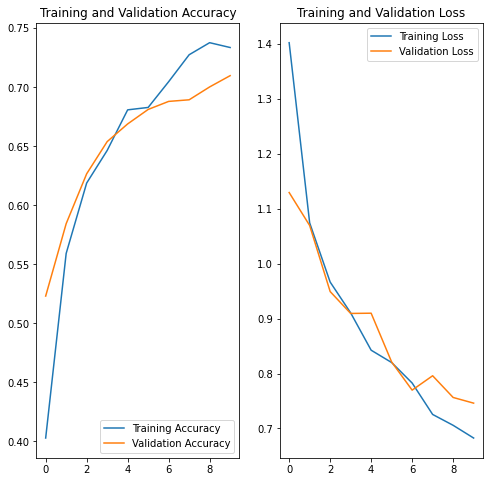

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **CNN Image Application**